In [15]:
from pocket_cube.cube import Cube
from pocket_cube.cube import Move
import matplotlib.pyplot as pyplot

%matplotlib notebook
%matplotlib inline

# Creating a scrambled cube 

In [45]:
cube = Cube("F U U F' U' R R F' R")

## 2D Cube visualization 

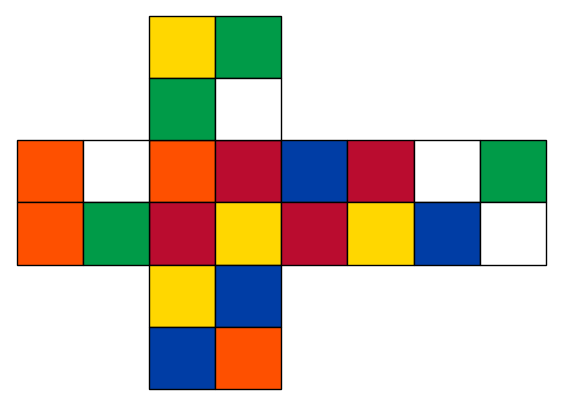

In [17]:
cube.render()

## Text representation 

In [18]:
cube.render_text()

  YG
  GW
OWORBRWG
OGRYRYBW
  YB
  BO


## 3D Cube visualization

For an interactive view of the cube, don't forget to use `%matplotlib notebook`

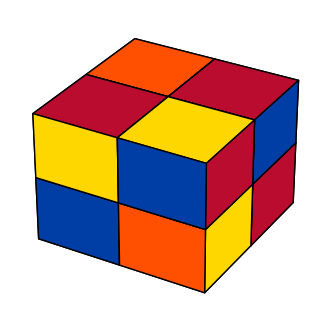

In [19]:
cube.render3D()

# Creating an unscrambled cube 

In [20]:
unscrambledCube = Cube(scrambled=False)

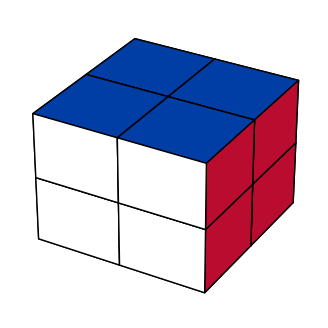

In [21]:
unscrambledCube.render3D()

## Applying moves on the cube 

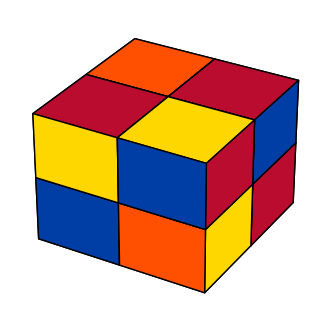

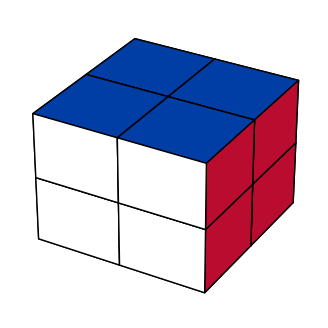

In [22]:
cube.render3D()
unscrambledCube.render3D()

In [23]:
start = cube.clone_state()
final = unscrambledCube.clone_state()

is_final = lambda position: all(position.state == final)

print(is_final(cube))

False


In [24]:
def get_neighbours(_cube):
    l=[]
    
    cube_R=_cube.move(Move.R)
    l.append(cube_R)
    cube_Rp=_cube.move(Move.Rp)
    l.append(cube_Rp)
    cube_F=_cube.move(Move.F)
    l.append(cube_F)
    cube_Fp=_cube.move(Move.Fp)
    l.append(cube_Fp)
    cube_U=_cube.move(Move.U)
    l.append(cube_U)    
    cube_Up=_cube.move(Move.Up)
    l.append(cube_Up)
    return l

In [25]:
from heapq import heappop, heappush

priority_queue = []

faces={}
for i in range(24):
    faces[i] = i // 4

In [298]:
cube = Cube("U' R U' F' R F F U' F U U")

def get_cost(m, n):
    if (m==n):
        return 0
    if((m==1 and n==3) or (m==3 and n==1)):
        return 2
    if((m==4 and n==5) or (m==5 and n==4)):
        return 2
    if((m==0 and n==2) or (m==2 and n==0)):
        return 2
    
    return 1

face_color = {
    0: "green",
    1: "blue",
    2: "white",
    3: "yellow",
    4: "orange",
    5: "red"
}

color_face = {
    0: 1,  # blue
    1: 5,  # red
    2: 0,  # green
    3: 4,  # orange
    4: 3,  # yellow
    5: 2   # white 
}

def h1(a, b):
    sum = 0
    for _, corner_val in a.get_corners().items():
        x = corner_val[0][0]
        y = corner_val[0][1]
        z = corner_val[0][2]
        face1 = corner_val[1][0]
        face2 = corner_val[1][1]
        face3 = corner_val[1][2]
        if a.state[x] != face_color[face1]:
            sum+=get_cost(color_face[a.state[x]], face1)
        if a.state[y] != face_color[face2]:
            sum+=get_cost(color_face[a.state[y]], face2)
        if a.state[z] != face_color[face3]:
            sum+=get_cost(color_face[a.state[z]], face3)
        
    return sum/1.5

def h5(a, b):
    total_distance = 0

    for position, (correct_position, correct_orientation) in cube.get_corners().items():
        current_position = [a.state[i] for i in correct_position]
        current_orientation = [a.state[i] for i in correct_orientation]

        # Calculate the Manhattan distance for the position
        position_distance = sum(abs(cp - cc) for cp, cc in zip(current_position, position))
        total_distance += position_distance

        # Calculate the Manhattan distance for the orientation
        orientation_distance = sum(abs(co - cc) for co, cc in zip(current_orientation, [0, 1, 2]))
        total_distance += orientation_distance

    return total_distance

print(h1(cube, unscrambledCube))
print(h5(cube, unscrambledCube))

12.0
102


Drumul are 11 mutări


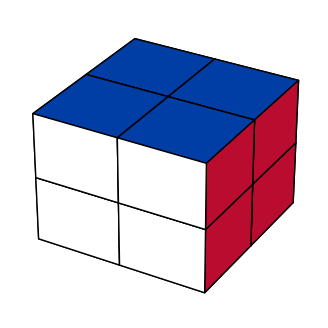

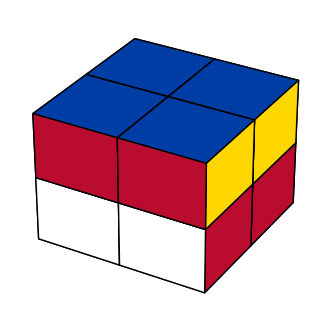

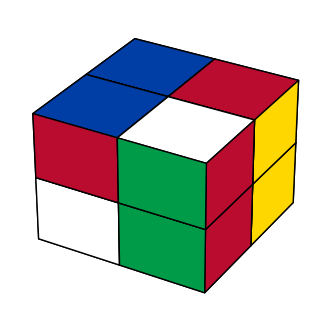

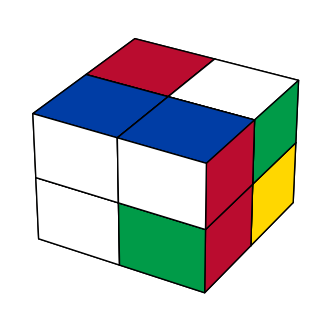

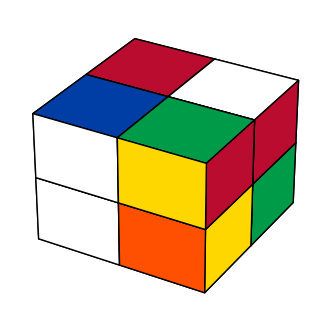

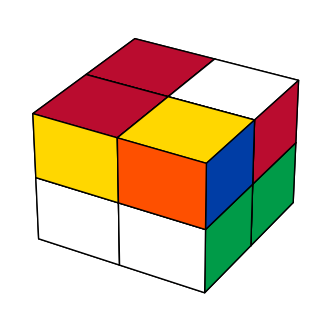

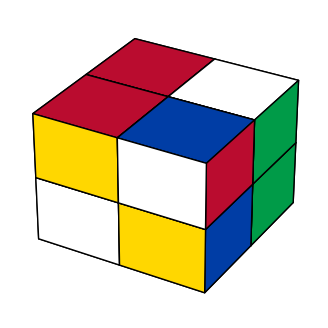

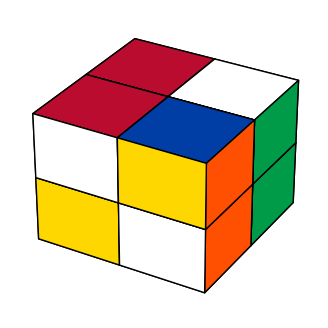

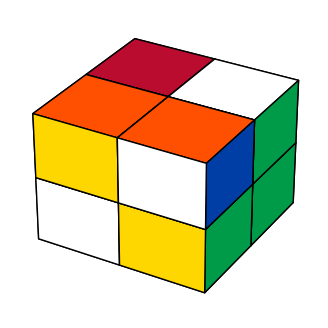

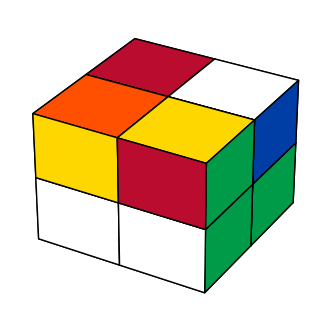

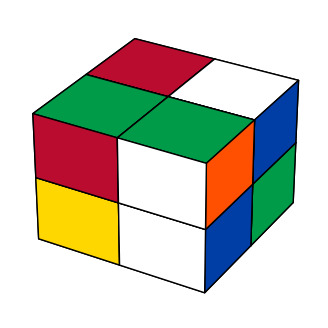

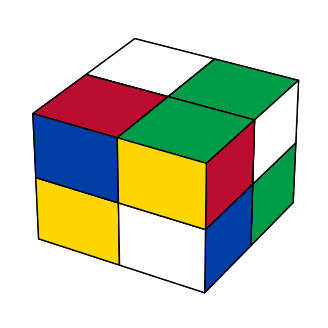

CPU times: user 912 ms, sys: 1.22 s, total: 2.13 s
Wall time: 595 ms


In [306]:
def astar(start_cube, end, h):
    # Frontiera, ca listă (heap) de tupluri (cost-total-estimat, nod)
    frontier = []
    heappush(frontier, (0 + h(start_cube, end), start_cube))
    # Nodurile descoperite ca dicționar nod -> (părinte, cost-până-la-nod)
    discovered = {start_cube.hash(): (None, 0)}
    while frontier:
        s=heappop(frontier)
        (f, current_cube)=s
        if is_final(current_cube):
            break
        for v in get_neighbours(current_cube):
            g_s=discovered[current_cube.hash()][1]
            if (v.hash() not in discovered or discovered[v.hash()][1]>g_s+1):
                discovered[v.hash()]=(s,  1 + g_s)
                heappush(frontier, (g_s + 1 + h(v, end), v))

    path = []
    while current_cube.hash() != start_cube.hash():
        if current_cube.hash() in discovered:
            path.append(current_cube)
            (s, cost) = discovered[current_cube.hash()]
            if s is not None:
                (cost, current_cube) = s
            else:
                break
        else:
            break
    
    path.append(start_cube)
    path.reverse()
    print("Drumul are {} mutări".format(len(path) - 1))
    path.reverse()
    for c in path:
        c.render3D()
    
    return path

%time astar(cube, unscrambledCube, h3)

Found
Drumul are 12 mutări


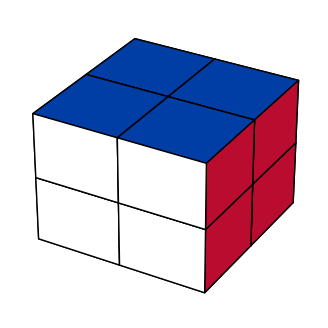

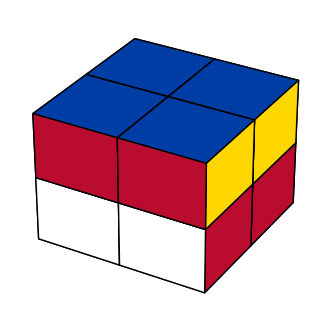

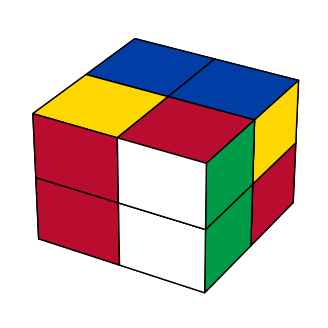

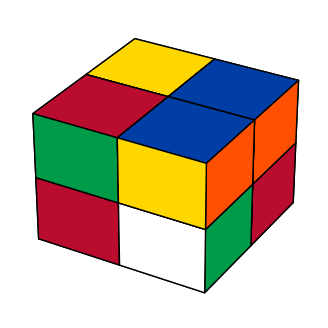

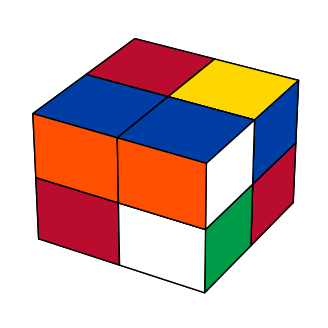

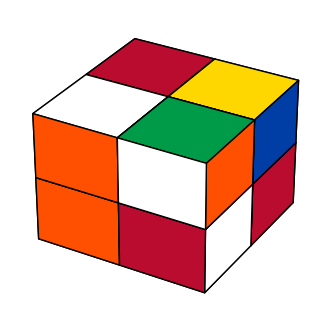

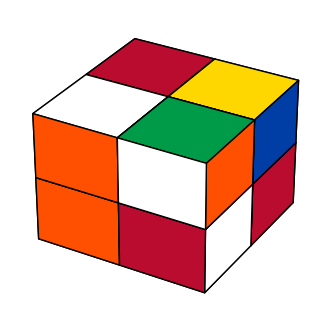

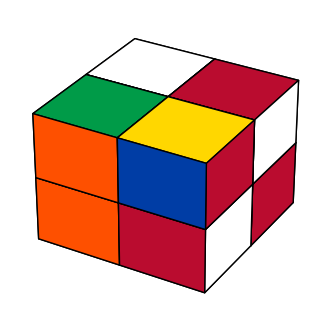

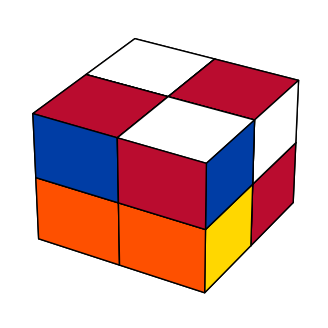

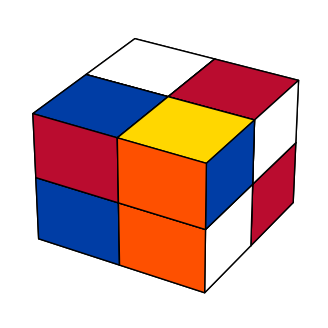

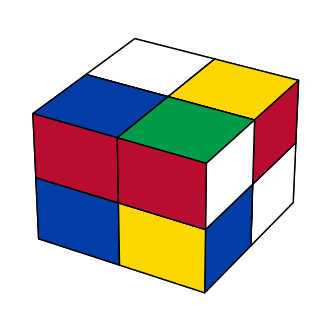

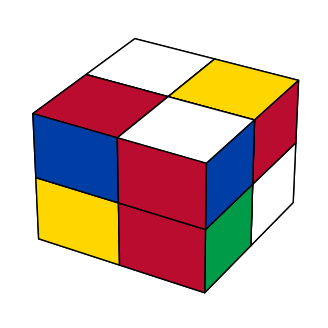

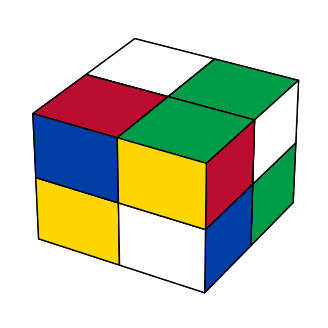

CPU times: user 1.69 s, sys: 1.38 s, total: 3.08 s
Wall time: 1.32 s


In [116]:
visited_from_start = {}
queue_from_start = []
visited_from_end = {}
queue_from_end = []

def bfs(start_cube, end_cube):
    visited_from_start[start_cube.hash()] = None
    queue_from_start.append(start_cube)
    visited_from_end[end_cube.hash()] = None
    queue_from_end.append(end_cube)
    
    found=False
    while queue_from_start and queue_from_end:
        current_cube_start = queue_from_start.pop(0)
        current_cube_end = queue_from_end.pop(0)
        
        l1 = get_neighbours(current_cube_start)
        l2 = get_neighbours(current_cube_end)
        
        for v in l1:
            if v.hash() not in visited_from_start:
                visited_from_start[v.hash()]=current_cube_start
                queue_from_start.append(v)
                if v.hash() in visited_from_end:
                    common = v.clone()
                    found = True
                    break
        if found:
            break
        for v in l2:
            if v.hash() not in visited_from_end:
                visited_from_end[v.hash()]=current_cube_end
                queue_from_end.append(v)
                if v.hash() in visited_from_start:
                    common = v.clone()
                    found = True
                    break
        if found:
            break
    if found:
        print("Found")
    else:
        print("Not found")
        
    path = []
    current_cube = common.clone()
    while current_cube.hash() != start_cube.hash():
        if current_cube.hash() in visited_from_start:
            path.append(current_cube)
            if visited_from_start[current_cube.hash()] is not None:
                current_cube = visited_from_start[current_cube.hash()]
            else:
                break
        else:
            break
            
    path.append(start_cube)
    path.reverse()
    
    current_cube = common.clone()
    while current_cube.hash() != end_cube.hash():
        if current_cube.hash() in visited_from_end:
            path.append(current_cube)
            if visited_from_end[current_cube.hash()] is not None:
                current_cube = visited_from_end[current_cube.hash()]
            else:
                break
        else:
            break
            
    path.append(end_cube)
  
    path.reverse()
    print("Drumul are {} mutări".format(len(path) - 1))
    for c in path:
        c.render3D()
  
    return path

%time bfs(cube, unscrambledCube)                 

In [29]:
from random import choice

def get_available_actions(_cube):
    h = _cube.hash()
    l=[(Move.R, h), (Move.Rp, h), (Move.F, h), 
       (Move.Fp, h), (Move.U, h), (Move.Up, h)]
    
    return l

print(get_available_actions(cube))

[(<Move.R: 0>, '521252101210333445030445'), (<Move.Rp: 3>, '521252101210333445030445'), (<Move.F: 1>, '521252101210333445030445'), (<Move.Fp: 4>, '521252101210333445030445'), (<Move.U: 2>, '521252101210333445030445'), (<Move.Up: 5>, '521252101210333445030445')]


In [30]:
def apply_action(current_cube, action):
    return current_cube.move(action[0])

In [31]:
# Constante

N = 'N'
Q = 'Q'
PARENT = 'parent'
ACTIONS = 'actions'

def print_tree(tree, indent = 0):
    if not tree:
        return
    tab = "".join(" " * indent)
    print("%sN = %d, Q = %f" % (tab, tree[N], tree[Q]))
    print(tree[PARENT])
    for a in tree[ACTIONS]:
        print(f"{tab} {a} ==> ")
        print_tree(tree[ACTIONS][a], indent + 3)

In [32]:
# Funcție ce întoarce un nod nou,
# eventual copilul unui nod dat ca argument
def init_node(parent):
    return {N: 0, Q: 0, PARENT: parent, ACTIONS: {}}

In [148]:
from math import sqrt, log

CP = 1.0 / sqrt(2.0)

# Funcție ce alege o acțiune dintr-un nod
def select_action(node, c = CP):
    # TODO <2>
    # Se caută acțiunea a care maximizează expresia:
    # Q_a / N_a  +  c * sqrt(2 * log(N_node) / N_a)
    N_node = node[N]
    max = -1
    
    for action, next in node[ACTIONS].items():
        score = next[Q] / next[N] + c * sqrt(2 * log(N_node) / next[N])

        if score > max:
            max = score
            best_action = action

    return best_action

In [256]:
# Algoritmul MCTS (UCT)
#  state0 - starea pentru care trebuie aleasă o acțiune
#  budget - numărul de iterații permis
#  tree - un arbore din explorările anterioare
def h4(a, b):
    sum = 0
    for _, corner_val in a.get_corners().items():
        x = corner_val[0][0]
        y = corner_val[0][1]
        z = corner_val[0][2]
        face1 = corner_val[1][0]
        face2 = corner_val[1][1]
        face3 = corner_val[1][2]
        if a.state[x] == face_color[face1] and a.state[y] == face_color[face2] and a.state[z] == face_color[face3]:
            sum+=10
        
    return sum
    
cube = Cube("F U U F' U' R R F' R")
def mcts(start_cube, budget, tree):
    # arborele de start este un nod gol
    
    tree = init_node(None)

    for _ in range(budget):
        # Punctul de start al simulării va fi rădăcina de start
        current_cube = start_cube.clone()
        node = tree
        
        # Coborâm în arbore până când ajungem la o stare finală
        # sau la un nod cu acțiuni neexplorate.
        # Variabilele current_cube și node se 'mută' împreună.
        while (not is_final(current_cube)
            and all(action in node[ACTIONS] for action in get_available_actions(current_cube))):
            new_action = select_action(node)
            current_cube = apply_action(current_cube, new_action)
            node = node[ACTIONS][new_action]
        
        # Dacă am ajuns într-un nod care nu este final și din care nu s-au
        # `încercat` toate acțiunile, construim un nod nou.
        if not is_final(current_cube):
            for action in get_available_actions(current_cube):
                if action not in node[ACTIONS]:
                    new_action = action
                    break
            current_cube = apply_action(current_cube, new_action)
            node = init_node(node)
            node[PARENT][ACTIONS][new_action] = node

        # Se simulează o desfășurare a jocului până la ajungerea într-o
        # starea finală. Se evaluează recompensa în acea stare.
        done = 0
        max = -1
        while not is_final(current_cube):
            r = h4(current_cube, unscrambledCube)
            if r > max:
                max = r
            current_cube = apply_action(current_cube, choice(get_available_actions(current_cube)))
            if done == 15:
                break
            done += 1
        
        if is_final(current_cube):
            reward = 200
        else:
            reward = r

        # Se actualizează toate nodurile de la node către rădăcină:
        #  - se incrementează valoarea N din fiecare nod
        #  - se adaugă recompensa la valoarea Q
        current_node = node
        while current_node:
            current_node[N] += 1
            current_node[Q] += reward
            current_node = current_node[PARENT]

    path = []
    current_cube=start_cube.clone()
    path.append(current_cube)
    while(not is_final(current_cube) and len(tree[ACTIONS])!=0):
        max = -1
        best_action_in_path = None
        for action in tree[ACTIONS]:
            if tree[ACTIONS][action][Q]>max:
                max=tree[ACTIONS][action][Q]
                best_action_in_path = action
        path.append(current_cube)
        tree = tree[ACTIONS][best_action_in_path]
        current_cube=apply_action(current_cube, best_action_in_path)
    path.append(current_cube)
    
    print("Drumul are {} mutări".format(len(path) - 1))
    path.reverse()
    for c in path:
        c.render3D()


Drumul are 7 mutări


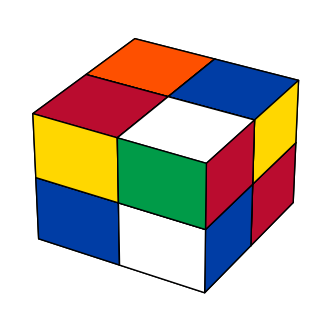

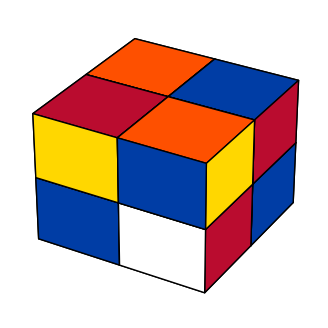

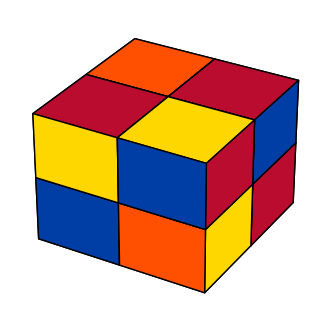

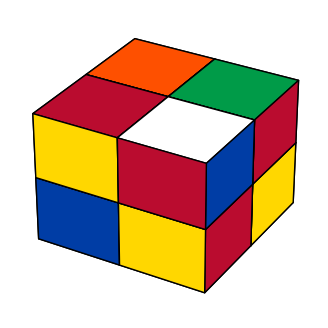

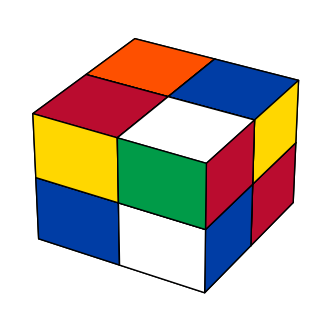

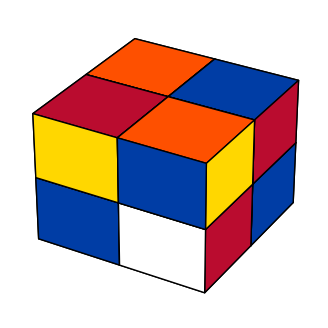

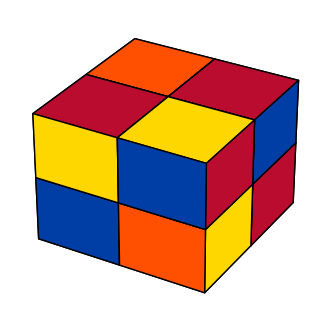

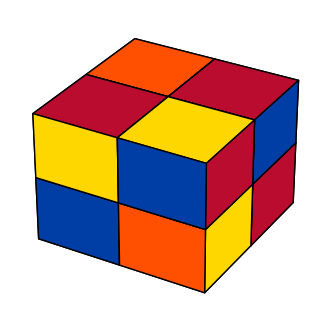

CPU times: user 33.1 s, sys: 1.15 s, total: 34.2 s
Wall time: 32.9 s


In [258]:
def play_game(budget):
    state = cube.clone()

    mcts(state, budget, None)

%time play_game(20000)

In [36]:
def get_distance(nr):
    previous=0
    distance=1
    for i in range(1, 9):
        if i==1:
            shift=0
        else:
            shift=pow(6, i-1)
        if nr>previous+shift and nr<=pow(6, i)+previous+shift:
            return distance
        else:
            distance +=1
        previous+=shift
    
visited = {}
queue = []
catalog = {}

def bfs_pattern_db(end_cube):
    visited[end_cube.hash()]=None
    queue.append(end_cube)
    nr = 0
    
    while queue:
        current_cube = queue.pop(0)

        for v in get_neighbours(current_cube):
            nr+=1
            if v.hash() not in visited:
                visited[v.hash()]=current_cube
                queue.append(v)
            if v.hash() not in catalog:
                distance=get_distance(nr)
                if distance == 8:
                    break
                catalog[v.hash()]=distance
        if distance == 8:
            break

%time bfs_pattern_db(unscrambledCube)

CPU times: user 31.9 s, sys: 410 ms, total: 32.4 s
Wall time: 32.1 s


In [260]:
def h3(a, b):
    if a.hash() in catalog:
        return catalog[a.hash()]
    else:
        return h1(a, b)

h3(unscrambledCube.move(Move.U).move(Move.Fp).move(Move.R).move(Move.U)
   .move(Move.Fp).move(Move.Rp).move(Move.F), unscrambledCube)

7